In [15]:
import pandas as pd
import numpy as np


telecom = pd.read_csv("churn.csv")
telecom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [2]:
print(telecom.describe())
print()
print(telecom.info())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines 

In [3]:
telecom.shape

(7043, 21)

In [4]:
telecom["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
telecom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [12]:
for i in telecom.columns:
    print(i)
    print(telecom[i].value_counts())


customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes   

In [16]:
varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 
            'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

# Printing the dataset after mapping
telecom.head()
print(telecom.shape)

(7043, 21)


In [7]:
telecom["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [85]:
telecom[['Contract_One year', 'Contract_Two year']]

Contract_One year  Contract_Two year
0                     0                  0
1                     1                  0
2                     0                  0
3                     1                  0
4                     0                  0
...                 ...                ...
7038                  1                  0
7039                  1                  0
7040                  0                  0
7041                  0                  0
7042                  0                  1

[7043 rows x 2 columns]

In [17]:
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod','gender','InternetService']],drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

# Printing the dataset
telecom.head()
print(telecom.shape)

(7043, 29)


In [62]:
telecom["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [63]:
telecom["Contract"]

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [86]:
telecom["MultipleLines"].value_counts()
#DeviceProtection', 'TechSupport', 
                        #'StreamingTV', 'StreamingMovies'

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [23]:
ml1

MultipleLines_No  MultipleLines_Yes
0                    0                  0
1                    1                  0
2                    1                  0
3                    0                  0
4                    1                  0
...                ...                ...
7038                 0                  1
7039                 0                  1
7040                 0                  0
7041                 0                  1
7042                 1                  0

[7043 rows x 2 columns]

In [9]:
# Creating dummy variables for the variable 'MultipleLines'

col=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in col:
    ml = pd.get_dummies(telecom[i], prefix=i)
    # Dropping MultipleLines_No phone service column
    colname=i+"_No internet service"
    ml1 = ml.drop([colname], 1)
    #Adding the results to the master dataframe
    telecom = pd.concat([telecom,ml1], axis=1)




/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/2154413997.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([colname], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/2154413997.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([colname], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/2154413997.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([colname], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/2154413997.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([colname], 1)
/var/folders/j0/2n97nj_x

In [95]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [64]:

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)












# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

#Printing the dataset
telecom.head()

/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_30493/2365262345.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_30493/2365262345.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1 = os.drop(['OnlineSecurity_No internet service'], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_30493/2365262345.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_30493/2365262345.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument '

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  OnlineBackup_No OnlineBackup_Yes DeviceProtection_No DeviceProtection_Yes  \
0               0                1                   1                    0   
1               1                0                   0                    1   
2               0                1                   1                    0   
3               1                0                   0                    1   
4               1                0                   1                    0   

  TechSupport_No TechSupport_Yes  StreamingTV_No StreamingTV_Yes  \
0              1               0               1               0   
1              1               0               1               0   
2              1               0               1               0   
3              0               1               1               0   
4              1               0               1               0   

   StreamingMovies_No StreamingMovies_Yes  
0                   1                   0  
1                   1                   0  
2                   1                   0  
3                   1                   0  
4                   1                   0  

[5 rows x 43 columns]

In [50]:
ml.columns

Index(['StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object')

In [52]:
c=pd.get_dummies(telecom["OnlineBackup"])

In [53]:
c

No  No internet service  Yes
0      0                    0    1
1      1                    0    0
2      0                    0    1
3      1                    0    0
4      1                    0    0
...   ..                  ...  ...
7038   1                    0    0
7039   0                    0    1
7040   1                    0    0
7041   1                    0    0
7042   1                    0    0

[7043 rows x 3 columns]

In [51]:
telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [18]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], 
                    prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)
print(telecom.shape)



(7043, 31)


/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/263907834.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop(['MultipleLines_No phone service'], 1)


In [19]:
col=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
     'TechSupport', 
     'StreamingTV', 'StreamingMovies']
# Creating dummy variables for the variable 'MultipleLines'

for i in col:

    ml = pd.get_dummies(telecom[i], prefix=i)
    # Dropping MultipleLines_No phone service column
    a=i+"_No internet service"
    ml1 = ml.drop([a], 1)
    #Adding the results to the master dataframe
    telecom = pd.concat([telecom,ml1], axis=1)


print(telecom.shape)











(7043, 43)


/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/1332471921.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([a], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/1332471921.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([a], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/1332471921.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([a], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/1332471921.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1 = ml.drop([a], 1)
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000

In [49]:
telecom.shape

(7043, 43)

In [91]:
telecom["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [20]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines',
                        'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 
                        'StreamingTV', 'StreamingMovies'], 1)


/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/4223802969.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines',


In [21]:
telecom.shape

(7043, 32)

In [13]:
telecom.head()

customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  7590-VHVEG              0        1           0       1             0   
1  5575-GNVDE              0        0           0      34             1   
2  3668-QPYBK              0        0           0       2             1   
3  7795-CFOCW              0        0           0      45             0   
4  9237-HQITU              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges TotalCharges  Churn  ...  OnlineBackup_No  \
0                 1           29.85        29.85      0  ...                0   
1                 0           56.95       1889.5      0  ...                1   
2                 1           53.85       108.15      1  ...                0   
3                 0           42.30      1840.75      0  ...                1   
4                 1           70.70       151.65      1  ...                1   

   OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_Yes  \
0                 1                    1                     0   
1                 0                    0                     1   
2                 1                    1                     0   
3                 0                    0                     1   
4                 0                    1                     0   

   TechSupport_No  TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  \
0               1                0               1                0   
1               1                0               1                0   
2               1                0               1                0   
3               0                1               1                0   
4               1                0               1                0   

   StreamingMovies_No  StreamingMovies_Yes  
0                   1                    0  
1                   1                    0  
2                   1                    0  
3                   1                    0  
4                   1                    0  

[5 rows x 30 columns]

In [23]:

# The varaible was imported as a string we need to convert it to float
telecom["TotalCharges"]=pd.to_numeric(telecom["TotalCharges"],
                                      errors="coerce")

# Cheking the data type of all the columns
telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [26]:
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
dtype: int64

In [22]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [24]:
telecom.isnull().sum()
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [25]:
telecom.shape

(7032, 32)

In [14]:
b=[1,2,3,4,6,7]

In [18]:
print(b)

# -1, -3, -6, -10, -16.....

[1, 2, 3, 4, 6, 7]


In [15]:
np.sum(b)

23

In [16]:
np.mean(b)

3.8333333333333335

In [17]:
np.std(b)

2.1147629234082532

In [31]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  PaperlessBilling  \
0              0        1           0       1             0                 1   
1              0        0           0      34             1                 0   
2              0        0           0       2             1                 1   
3              0        0           0      45             0                 0   
4              0        0           0       2             1                 1   

   MonthlyCharges  TotalCharges  Contract_One year  Contract_Two year  ...  \
0           29.85         29.85                  0                  0  ...   
1           56.95       1889.50                  1                  0  ...   
2           53.85        108.15                  0                  0  ...   
3           42.30       1840.75                  1                  0  ...   
4           70.70        151.65                  0                  0  ...   

   OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                0                 1                    1   
1                1                 0                    0   
2                0                 1                    1   
3                1                 0                    0   
4                1                 0                    1   

   DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                     0               1                0               1   
1                     1               1                0               1   
2                     0               1                0               1   
3                     1               0                1               1   
4                     0               1                0               1   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
0                0                   1                    0  
1                0                   1                    0  
2                0                   1                    0  
3                0                   1                    0  
4                0                   1                    0  

[5 rows x 30 columns]

In [45]:
y = telecom['Churn']

print(y.head())

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,  random_state=100)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [33]:
X_train.shape

(5625, 30)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1010              0        0           0 -1.201477             1   
2732              0        0           1 -1.160653             1   
2940              1        0           0  0.839728             0   
859               0        1           1  1.615386             0   
2895              0        1           0  0.186543             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Contract_One year  \
1010                 1       -0.483666     -0.937173                  0   
2732                 0       -1.472880     -0.966413                  0   
2940                 1       -0.340687      0.249914                  0   
859                  1        0.003460      1.071889                  0   
2895                 1       -1.491168     -0.691863                  1   

      Contract_Two year  ...  OnlineBackup_No  OnlineBackup_Yes  \
1010                  0  ...                1                 0   
2732                  0  ...                0                 0   
2940                  0  ...                0                 1   
859                   1  ...                0                 1   
2895                  0  ...                0                 0   

      DeviceProtection_No  DeviceProtection_Yes  TechSupport_No  \
1010                    1                     0               1   
2732                    0                     0               0   
2940                    0                     1               1   
859                     0                     1               0   
2895                    0                     0               0   

      TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
1010                0               1                0                   1   
2732                0               0                0                   0   
2940                0               0                1                   0   
859                 1               0                1                   0   
2895                0               0                0                   0   

      StreamingMovies_Yes  
1010                    0  
2732                    0  
2940                    1  
859                     1  
2895                    0  

[5 rows x 30 columns]

In [43]:
telecom.corr()["Churn"]

SeniorCitizen                            0.150541
Partner                                 -0.149982
Dependents                              -0.163128
tenure                                  -0.354049
PhoneService                             0.011691
PaperlessBilling                         0.191454
MonthlyCharges                           0.192858
TotalCharges                            -0.199484
Churn                                    1.000000
Contract_One year                       -0.178225
Contract_Two year                       -0.301552
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Electronic check           0.301455
PaymentMethod_Mailed check              -0.090773
gender_Male                             -0.008545
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
MultipleLines_No                        -0.032654
MultipleLines_Yes                        0.040033
OnlineSecurity_No                        0.342235


In [47]:
X_train=X_train[["tenure","TechSupport_No","PaymentMethod_Electronic check"]]

In [48]:
X_test=X_test[["tenure","TechSupport_No","PaymentMethod_Electronic check"]]

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)

0.7199715707178393

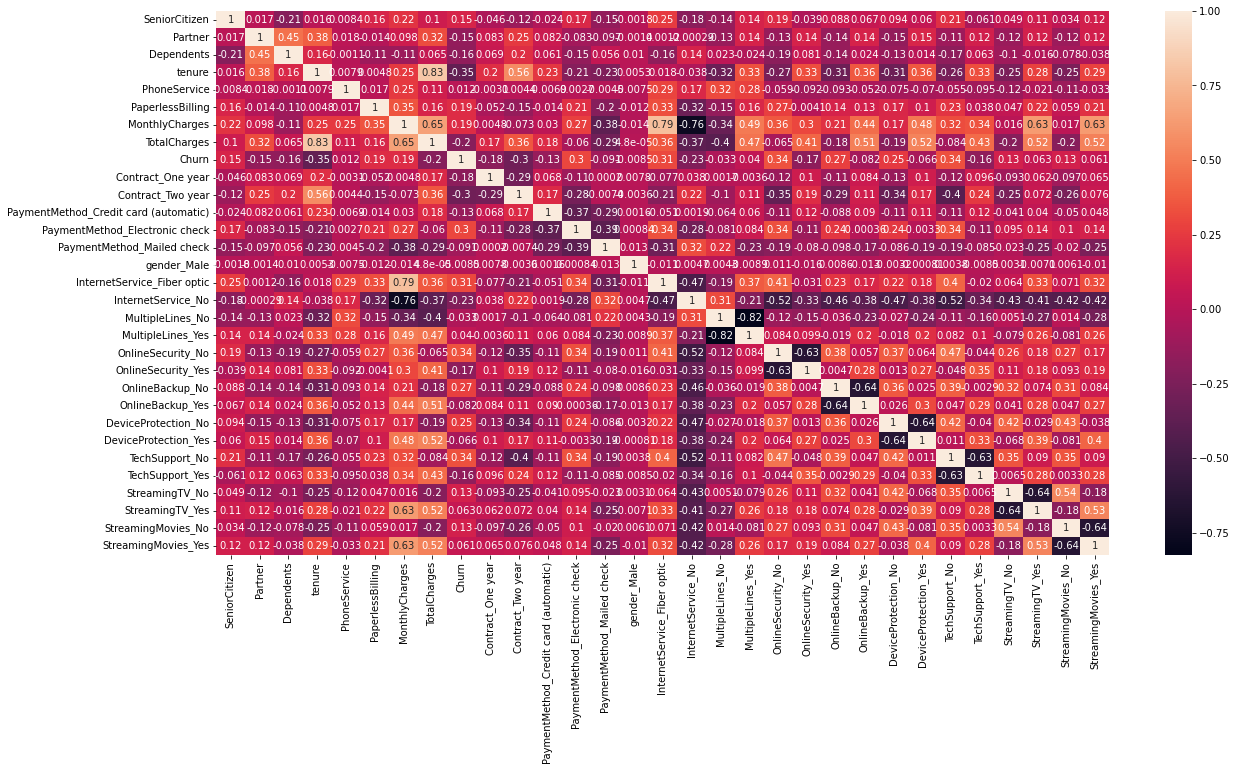

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()


In [38]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                      'TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                        'TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)

/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/185218430.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
/var/folders/j0/2n97nj_x0j57brw2fbcryn5r0000gn/T/ipykernel_36409/185218430.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',


In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()